In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
def approximated_func(x_1, x_2):

    if ((np.square(x_1) + np.square(x_2)) <= 1):
        return 1
    else:
        return (-1)

In [19]:
# the range of x_1 and x_2 is between -2 and 2
# return 441 samples in np.array
def generate_dataset():

    x_1 = []
    x_2 = []

    count = -2
    while (count <= 2):
        x_1.append(count)
        x_2.append(count)
        count += 0.2

    attribute = []
    for i in x_1:
        for j in x_2:
            sample_attribute = []
            sample_attribute.append(i)
            sample_attribute.append(j)
            attribute.append(sample_attribute)

    label = []
    for i in attribute:
        res = approximated_func(i[0], i[1])
        label.append(res)

    np.array(attribute)
    np.array(label)

    return attribute, label

In [20]:
def random_select_center(attribute):

    num = 150
    index_total = np.array(range(len(attribute)))
    np.random.shuffle(index_total)

    center = []
    for i in range(num):
        center.append(attribute[index_total[i]])

    return center

In [21]:
#devide thr genreated dataset to train dataset and test dataset ( 8 : 2 )
def div_train_test(attribute, label, sample_num):

    num_test = sample_num * 0.2

    attribute_test = []
    label_test = []

    attribute_train = []
    label_train = []

    index_total = np.array(range(sample_num))
    np.random.shuffle(index_total)

    for i in range(sample_num):
        if (i < num_test):
            attribute_test.append(attribute[index_total[i]])
            label_test.append(label[index_total[i]])
            continue

        attribute_train.append(attribute[index_total[i]])
        label_train.append(label[index_total[i]])

    attribute_train = np.array(attribute_train)
    label_train = np.array(label_train)
    attribute_test = np.array(attribute_test)
    label_test = np.array(label_test)
    return attribute_train, label_train, attribute_test, label_test

In [22]:
#define activation function in hidden layer for question 3
#use all the points in the training set as centers of RB function
#thus total 441 * 0.8 = 353 kernel functions in the nn

def Gausian_kernel(x, center, sigma):
    res = np.exp((-np.dot((x - center), (x - center))) / (2 * np.square(sigma)))
    return res

def outputlayer_activate_function(input):
    return input

def outputlayer_activate_function_der(input):
    return 1

In [23]:
class NN:
    def __init__(self, dataset,sigma):
        # input is two dimension, output is scalar, because all train samples are center of RB, thus 353 hidden layer nodes
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = len(dataset)
        self.sigma = sigma
        # random generate the weights for W2
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)  # 352 * 1


    def hiddenlayer_activate_function(self, input,train_dataset_attribute):

        res = []
        for i in train_dataset_attribute:
            ans = Gausian_kernel(input, i, self.sigma)
            ans = np.array(ans)

            res.append(ans)

        res = np.array(res)
        return res

    def MSE_total(self, train_dataset_attribute, total_dataset_attribute, label):

        count = 0
        total_err = 0
        for i in range(len(total_dataset_attribute)):

            predict = self.feedfoward(total_dataset_attribute[i], train_dataset_attribute)
            total_err += np.square((label[i] - predict))
            count += 1
        res = total_err / (count)
        return res


    def feedfoward(self, sample, train_dataset_attribute):


        hiddenlayer_output = self.hiddenlayer_activate_function(sample, train_dataset_attribute)

        outputlayer_input = np.dot(hiddenlayer_output.reshape(1,-1), self.W2.reshape(-1,1))

        res = outputlayer_activate_function(outputlayer_input)

        return res[0][0]


    #according problem1 in A2, i use that method to update W2 for each sample, use online training
    def train(self, train_dataset_attribute, train_dataset_label):
        #print(self.sigma)
        G = []
        for i in train_dataset_attribute:
            ans = self.hiddenlayer_activate_function(i, train_dataset_attribute)
            G.append(ans)
        G = np.array(G)

        G_plus = np.linalg.pinv(G)

        self.W2 = np.dot(G_plus, train_dataset_label.reshape(-1,1))

In [24]:
class NN1:
    def __init__(self,center ,sigma):
        # input is two dimension, output is scalar, because all train samples are center of RB, thus 353 hidden layer nodes
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 150
        self.sigma = sigma
        self.center= center
        # random generate the weights for W2
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)  # 352 * 1


    def hiddenlayer_activate_function(self, input):

        res = []
        for i in self.center:
            ans = Gausian_kernel(input, i, self.sigma)
            ans = np.array(ans)
            res.append(ans)

        res = np.array(res)
        return res

    def MSE_total(self, total_dataset_attribute, label):

        count = 0
        total_err = 0
        for i in range(len(total_dataset_attribute)):

            predict = self.feedfoward(total_dataset_attribute[i])
            total_err += np.square((label[i] - predict))
            count += 1

        res = total_err / (count)
        return res

    def feedfoward(self, sample):


        hiddenlayer_output = self.hiddenlayer_activate_function(sample)

        outputlayer_input = np.dot(hiddenlayer_output.reshape(1,-1), self.W2.reshape(-1,1))

        res = outputlayer_activate_function(outputlayer_input)

        return res[0][0]


    #according problem1 in A2, i use that method to update W2 for each sample, use online training
    #def train_W2(self, learning_rate, sigma, sample, train_dataset, sample_label):
    def train(self, train_dataset_attribute, train_dataset_label):
        #print(self.sigma)
        G = []
        for i in train_dataset_attribute:
            ans = self.hiddenlayer_activate_function(i)
            G.append(ans)
        G = np.array(G)

        G_plus = np.linalg.pinv(G)

        self.W2 = np.dot(G_plus, train_dataset_label.reshape(-1,1))


In [25]:
class NN2:
    def __init__(self,center ,sigma):
        # input is two dimension, output is scalar, because all train samples are center of RB, thus 353 hidden layer nodes
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 150
        self.sigma = sigma
        self.center= center
        # random generate the weights for W2
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)  # 352 * 1


    def hiddenlayer_activate_function(self, input):

        res = []
        for i in self.center:
            ans = Gausian_kernel(input, i, self.sigma)
            ans = np.array(ans)
            res.append(ans)
        res = np.array(res)
        return res

    def MSE_total(self, total_dataset_attribute, label):

        count = 0
        total_err = 0
        for i in range(len(total_dataset_attribute)):

            predict = self.feedfoward(total_dataset_attribute[i])
            total_err += np.square((label[i] - predict))
            count += 1
        res = total_err / (count)
        return res

    def feedfoward(self, sample):


        hiddenlayer_output = self.hiddenlayer_activate_function(sample)

        outputlayer_input = np.dot(hiddenlayer_output.reshape(1,-1), self.W2.reshape(-1,1))

        res = outputlayer_activate_function(outputlayer_input)

        return res[0][0]


    #according problem1 in A2, i use that method to update W2 for each sample, use online training
    def train(self, train_dataset_attribute, train_dataset_label):
        #print(self.sigma)
        G = []
        for i in train_dataset_attribute:
            ans = self.hiddenlayer_activate_function(i)
            G.append(ans)
        G = np.array(G)
        G_plus = np.linalg.pinv(G)
        self.W2 = np.dot(G_plus, train_dataset_label.reshape(-1,1))
        

In [26]:
def get_error_rate(train_attribute, test_attribute, label, classfier):

    predict_list = []
    for i in test_attribute:
        predict = classfier.feedfoward(i, train_attribute)
        predict_list.append(predict)

    count = 0
    for i in range(len(predict_list)):
        if (predict_list[i] >= 0):
            predict_list[i] = 1
        else:
            predict_list[i] = -1

        if predict_list[i] != label[i]:
            count += 1

    error_rate = count / len(predict_list)
    return error_rate

In [27]:
def get_error_rate_1(test_attribute, label, classfier):

    predict_list = []
    for i in test_attribute:
        #print(i)
        predict = classfier.feedfoward(i)
        predict_list.append(predict)

    count = 0
    for i in range(len(predict_list)):
        #print("predict: ",predict_list[i])
        #print("label: ", label[i])
        if (predict_list[i] > 0):
            predict_list[i] = 1
        else:
            predict_list[i] = -1

        if predict_list[i] != label[i]:
            count += 1

    error_rate = count / len(predict_list)
    return error_rate

In [28]:
if __name__ == "__main__":
    attribute, label = generate_dataset()
    attribute_train, label_train, attribute_test, label_test = div_train_test(attribute, label, 441)
    sigma_list = list(np.arange(2, 12,1))
    MSE_train_list = []
    MSE_test_list = []
    error_rate_train_list = []
    error_rate_test_list = []
    for j in sigma_list:
        RBF_NN = NN(attribute_train, j)

        RBF_NN.train(attribute_train, label_train)

        error_rate_train = get_error_rate(attribute_train, attribute_train, label_train, RBF_NN)
        error_rate_train_list.append(error_rate_train)

        error_rate_test = get_error_rate(attribute_train, attribute_test, label_test, RBF_NN)
        error_rate_test_list.append(error_rate_test)

        MSE_train = RBF_NN.MSE_total(attribute_train, attribute_train, label_train)
        MSE_train_list.append(MSE_train)

        MSE_test = RBF_NN.MSE_total(attribute_train, attribute_test, label_test)
        MSE_test_list.append(MSE_test)



In [29]:
    center_list = random_select_center(attribute)
    MSE_train_list_1 = []
    MSE_test_list_1 = []
    error_rate_train_list_1 = []
    error_rate_test_list_1 = []
    for j in sigma_list:
            RBF_NN_1 = NN1(center_list, j)

            RBF_NN_1.train(attribute_train, label_train)

            error_rate_train = get_error_rate_1(attribute_train, label_train, RBF_NN_1)
            error_rate_train_list_1.append(error_rate_train)

            error_rate_test = get_error_rate_1(attribute_test, label_test, RBF_NN_1)
            error_rate_test_list_1.append(error_rate_test)

            MSE_train = RBF_NN_1.MSE_total(attribute_train, label_train)
            MSE_train_list_1.append(MSE_train)

            MSE_test = RBF_NN_1.MSE_total(attribute_test, label_test)
            MSE_test_list_1.append(MSE_test)


    

In [30]:
    kmeans = KMeans(n_clusters=150, random_state=0).fit(attribute)
    center_list_1 = kmeans.cluster_centers_
    MSE_train_list_2 = []
    MSE_test_list_2 = []
    error_rate_train_list_2 = []
    error_rate_test_list_2 = []

    for j in sigma_list:
            RBF_NN_2 = NN2(center_list_1, j)

            RBF_NN_2.train(attribute_train, label_train)

            error_rate_train = get_error_rate_1(attribute_train, label_train, RBF_NN_2)
            error_rate_train_list_2.append(error_rate_train)

            error_rate_test = get_error_rate_1(attribute_test, label_test, RBF_NN_2)
            error_rate_test_list_2.append(error_rate_test)

            MSE_train = RBF_NN_2.MSE_total(attribute_train, label_train)
            MSE_train_list_2.append(MSE_train)

            MSE_test = RBF_NN_2.MSE_total(attribute_test, label_test)
            MSE_test_list_2.append(MSE_test)

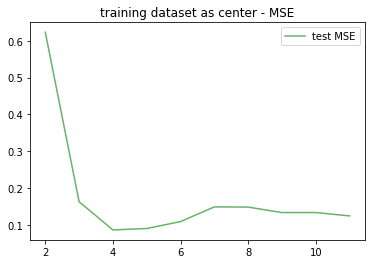

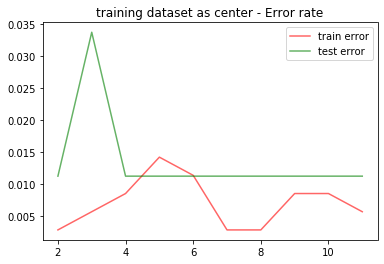

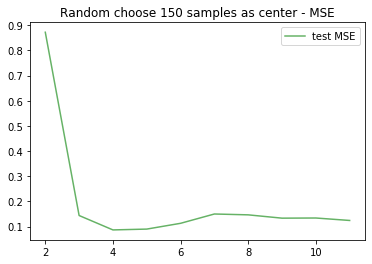

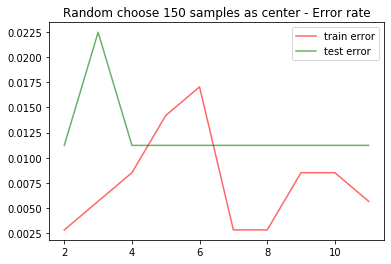

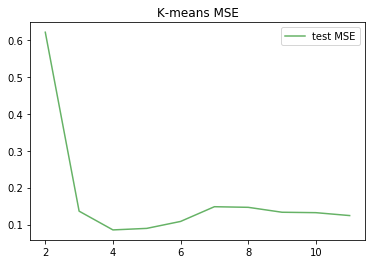

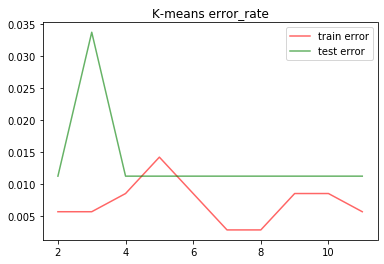

In [31]:
    plt.figure(1)

    plt.title('training dataset as center - MSE')
    #plt.plot(sigma_list, MSE_train_list,c = 'r', label = 'train MSE', alpha=0.6)
    plt.plot(sigma_list, MSE_test_list,c = 'g', label = 'test MSE', alpha=0.6)
    plt.legend()

    plt.figure(2)

    plt.title('training dataset as center - Error rate')
    plt.plot(sigma_list, error_rate_train_list,c = 'r', label = 'train error', alpha=0.6)
    plt.plot(sigma_list, error_rate_test_list,c = 'g', label = 'test error', alpha=0.6)
    plt.legend()


    plt.figure(3)

    plt.title('Random choose 150 samples as center - MSE')
    plt.plot(sigma_list, MSE_test_list_1,c = 'g', label = 'test MSE', alpha=0.6)
    plt.legend()

    plt.figure(4)

    plt.title('Random choose 150 samples as center - Error rate')
    plt.plot(sigma_list, error_rate_train_list_1,c = 'r', label = 'train error', alpha=0.6)
    plt.plot(sigma_list, error_rate_test_list_1,c = 'g', label = 'test error', alpha=0.6)
    plt.legend()

    plt.figure(5)

    plt.title('K-means MSE')
    plt.plot(sigma_list, MSE_test_list_2,c = 'g', label = 'test MSE', alpha=0.6)
    plt.legend()

    plt.figure(6)

    plt.title('K-means error_rate')
    plt.plot(sigma_list, error_rate_train_list_2,c = 'r', label = 'train error', alpha=0.6)
    plt.plot(sigma_list, error_rate_test_list_2,c = 'g', label = 'test error', alpha=0.6)
    plt.legend()

    plt.show()